In [26]:
import pandas as pd

In [27]:
df1 = pd.read_csv("Kaarina Yltöinen 5.3.2024 - 2.6.2024_92d75571-9bc8-45c5-9311-57190ed1f999.csv")
# df2 = pd.read_csv("Jyväskylä lentoasema AWOS 5.3.2024 - 27.5.2024_b3c005c8-3ce6-4dc3-8fe4-029e1f1ef733.csv")
aq = pd.read_csv("Kaarina Kaarina 5.3.2024 - 2.6.2024_2ad7c0b8-9721-4a0e-b09a-cc9c2bac5b01.csv")

df1["Date"] = df1["Vuosi"].astype(str) + "-" + df1["Kuukausi"].astype(str) + "-" +  df1["Päivä"].astype(str) + " " + df1["Aika [UTC]"]
df1["Date"] = pd.to_datetime(df1["Date"])

# df2["Date"] = df2["Vuosi"].astype(str) + "-" + df2["Kuukausi"].astype(str) + "-" +  df2["Päivä"].astype(str) + " " + df2["Aika [UTC]"]
# df2["Date"] = pd.to_datetime(df2["Date"])

aq["Date"] = aq["Vuosi"].astype(str) + "-" + aq["Kuukausi"].astype(str) + "-" +  aq["Päivä"].astype(str) + " " + aq["Aika [UTC]"]
aq["Date"] = pd.to_datetime(aq["Date"])

In [28]:
df1.set_index('Date', inplace=True)
# df2.set_index('Date', inplace=True)
# df2["Tunnin sademäärä [mm]"] = df1["Tunnin sademäärä [mm]"]
# df2.reset_index(inplace=True)
# weather = df2
weather = df1

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
merged_df = pd.merge(weather, aq, on="Date")


weather_columns = ["Ilmanpaineen keskiarvo [hPa]","Tunnin sademäärä [mm]","Kovin puuska [m/s]","Tuulen suunnan keskiarvo [°]","Kovin keskituulen nopeus [m/s]","Keskituulen nopeus [m/s]","Suhteellisen kosteuden keskiarvo [%]","Alin lämpötila [°C]","Ylin lämpötila [°C]","Lämpötilan keskiarvo [°C]"]
air_quality_columns = ["Hengitettävät hiukkaset <10 µm [µg/m3]"]

# Convert columns to numeric, coercing errors to NaN
merged_df[weather_columns] = merged_df[weather_columns].apply(pd.to_numeric, errors='coerce')
merged_df[air_quality_columns] = merged_df[air_quality_columns].apply(pd.to_numeric, errors='coerce')


# Calculate the median of each column
weather_medians = merged_df[weather_columns].median()
aq_medians = merged_df[air_quality_columns].median()

# Replace '-' (now NaN) with the median
merged_df[weather_columns] = merged_df[weather_columns].apply(lambda col: col.fillna(weather_medians[col.name]))
merged_df[air_quality_columns] = merged_df[air_quality_columns].apply(lambda col: col.fillna(aq_medians[col.name]))

correlation_with_PM10 = {}
for column in weather_columns:
    correlation_with_PM10[column] = merged_df["Hengitettävät hiukkaset <10 µm [µg/m3]"].corr(merged_df[column])


for column, correlation in correlation_with_PM10.items():
    print(f"{column} korrelaatio: {correlation}")

Ilmanpaineen keskiarvo [hPa] korrelaatio: 0.025016034632270208
Tunnin sademäärä [mm] korrelaatio: 0.019892078934066634
Kovin puuska [m/s] korrelaatio: nan
Tuulen suunnan keskiarvo [°] korrelaatio: nan
Kovin keskituulen nopeus [m/s] korrelaatio: nan
Keskituulen nopeus [m/s] korrelaatio: nan
Suhteellisen kosteuden keskiarvo [%] korrelaatio: 0.08130695126247423
Alin lämpötila [°C] korrelaatio: -0.07241008921977736
Ylin lämpötila [°C] korrelaatio: -0.06628654940525994
Lämpötilan keskiarvo [°C] korrelaatio: -0.0698291503911177


In [30]:
# fig, ax1 = plt.subplots(figsize=(10,8))

# fig
# ax1.bar(merged_df["Date"], merged_df["Hengitettävät hiukkaset <10 µm [µg/m3]"], alpha=0.6)
# ax1.set_xlabel('X Axis')
# ax1.set_ylabel('Bar Data', color='b')
# ax1.tick_params(axis='y', labelcolor='b')

# ax2 = ax1.twinx()
# ax2.plot(merged_df["Date"], merged_df[weather_columns[0]], color="g")
# ax2.set_ylabel(weather_columns[0], color='g')
# ax2.tick_params(axis='y', labelcolor='g')

# ax3 = ax1.twinx()
# ax3.spines['right'].set_position(('outward', 60)) 
# ax3.plot(merged_df["Date"], merged_df[weather_columns[1]], color="purple")
# ax3.set_ylabel(weather_columns[1], color='purple')
# ax3.tick_params(axis='y', labelcolor='purple')
# ax3.set_ylim(0,4)



# plt.title('Hengitettävien hiukkasten pitoisuus ja säähavainnot')
# plt.show()

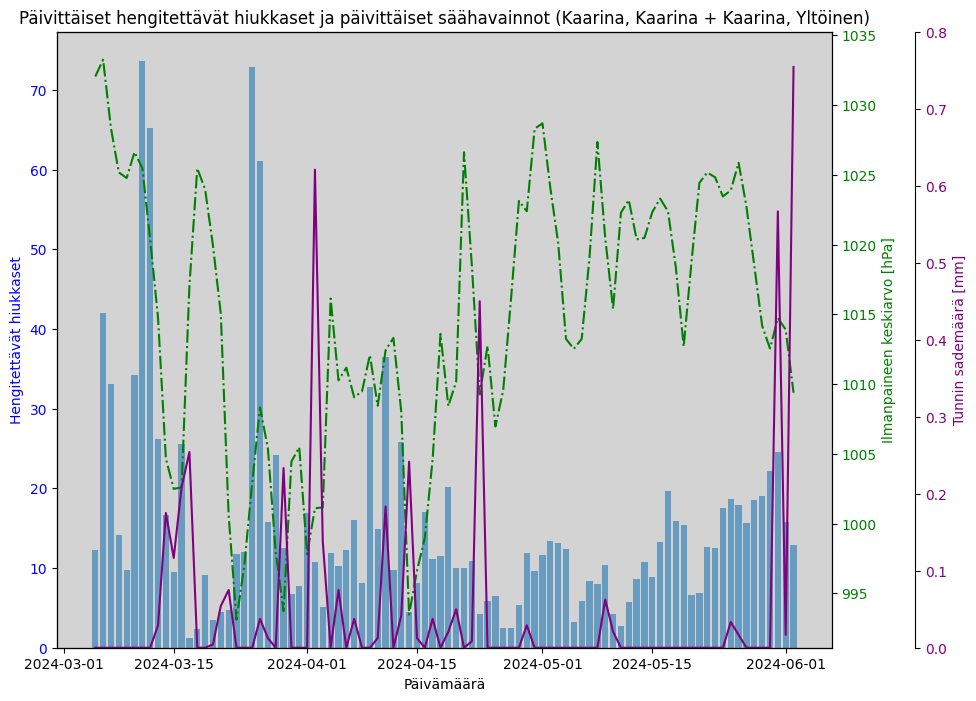

In [31]:
filter_df = merged_df[["Date","Ilmanpaineen keskiarvo [hPa]","Tunnin sademäärä [mm]","Kovin puuska [m/s]","Tuulen suunnan keskiarvo [°]","Kovin keskituulen nopeus [m/s]","Keskituulen nopeus [m/s]","Suhteellisen kosteuden keskiarvo [%]","Alin lämpötila [°C]","Ylin lämpötila [°C]","Lämpötilan keskiarvo [°C]", "Hengitettävät hiukkaset <10 µm [µg/m3]"]]
daily_averages = filter_df.resample('D', on='Date').mean().reset_index()


fig, ax1 = plt.subplots(figsize=(10,8))


ax1.bar(daily_averages["Date"], daily_averages["Hengitettävät hiukkaset <10 µm [µg/m3]"], alpha=0.6)
ax1.set_xlabel('Päivämäärä')
ax1.set_ylabel('Hengitettävät hiukkaset', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(daily_averages["Date"], daily_averages[weather_columns[0]], color="g", linestyle="dashdot")
ax2.set_ylabel(weather_columns[0], color='g')
ax2.tick_params(axis='y', labelcolor='g')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60)) 
ax3.plot(daily_averages["Date"], daily_averages[weather_columns[1]], color="purple")
ax3.set_ylabel(weather_columns[1], color='purple')
ax3.tick_params(axis='y', labelcolor='purple')
ax3.set_ylim(0,0.8)

# ax4 = ax1.twinx()
# ax4.spines['right'].set_position(('outward', 120)) 
# ax4.plot(daily_averages["Date"], daily_averages[weather_columns[5]], color="red", linestyle="dashdot")
# ax4.set_ylabel(weather_columns[5], color='red')
# ax4.tick_params(axis='y', labelcolor='red')


# ax5 = ax1.twinx()
# ax5.spines['right'].set_position(('outward', 180)) 
# ax5.plot(daily_averages["Date"], daily_averages[weather_columns[6]], color="yellow")
# ax5.set_ylabel(weather_columns[6], color='yellow')
# ax5.tick_params(axis='y', labelcolor='yellow')


ax1.set_facecolor('lightgray')
plt.title('Päivittäiset hengitettävät hiukkaset ja päivittäiset säähavainnot (Kaarina, Kaarina + Kaarina, Yltöinen)')
plt.show()




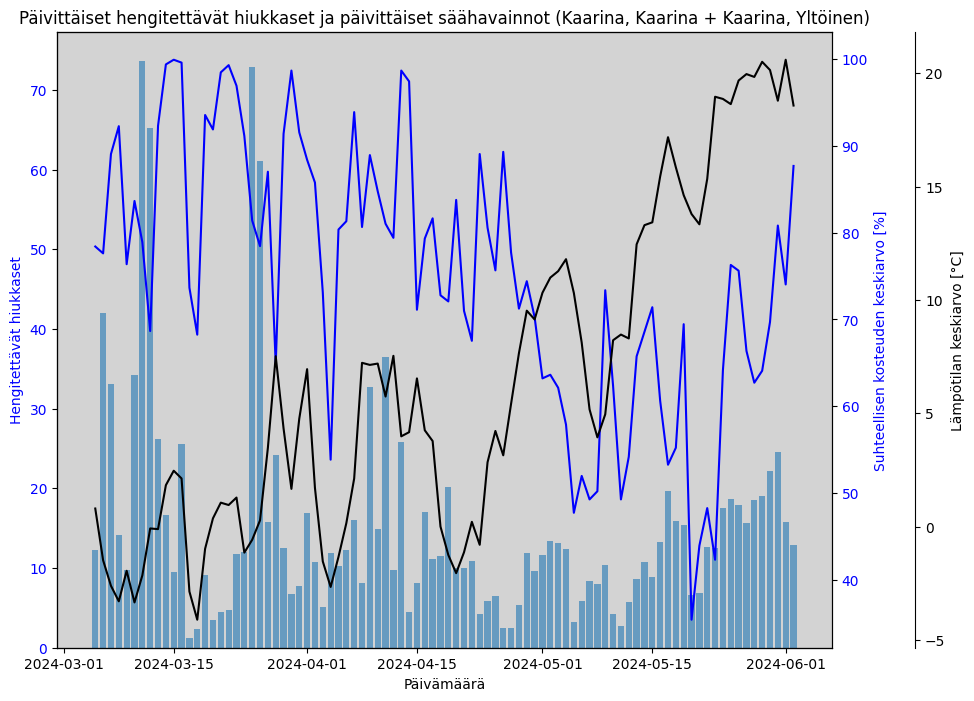

In [32]:
fig, ax1 = plt.subplots(figsize=(10,8))

fig
ax1.bar(daily_averages["Date"], daily_averages["Hengitettävät hiukkaset <10 µm [µg/m3]"], alpha=0.6)
ax1.set_xlabel('Päivämäärä')
ax1.set_ylabel('Hengitettävät hiukkaset', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(daily_averages["Date"], daily_averages[weather_columns[6]], color="blue")
ax2.set_ylabel(weather_columns[6], color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60)) 
ax3.plot(daily_averages["Date"], daily_averages[weather_columns[9]], color="black")
ax3.set_ylabel(weather_columns[9], color='black')
ax3.tick_params(axis='y', labelcolor='black')

# ax4 = ax1.twinx()
# ax4.spines['right'].set_position(('outward', 120)) 
# ax4.plot(daily_averages["Date"], daily_averages[weather_columns[5]], color="red")
# ax4.set_ylabel(weather_columns[5], color='red')
# ax4.tick_params(axis='y', labelcolor='red')


# ax5 = ax1.twinx()
# ax5.spines['right'].set_position(('outward', 180)) 
# ax5.plot(daily_averages["Date"], daily_averages[weather_columns[6]], color="yellow")
# ax5.set_ylabel(weather_columns[6], color='yellow')
# ax5.tick_params(axis='y', labelcolor='yellow')


ax1.set_facecolor('lightgray')
plt.title('Päivittäiset hengitettävät hiukkaset ja päivittäiset säähavainnot (Kaarina, Kaarina + Kaarina, Yltöinen)')
plt.show()


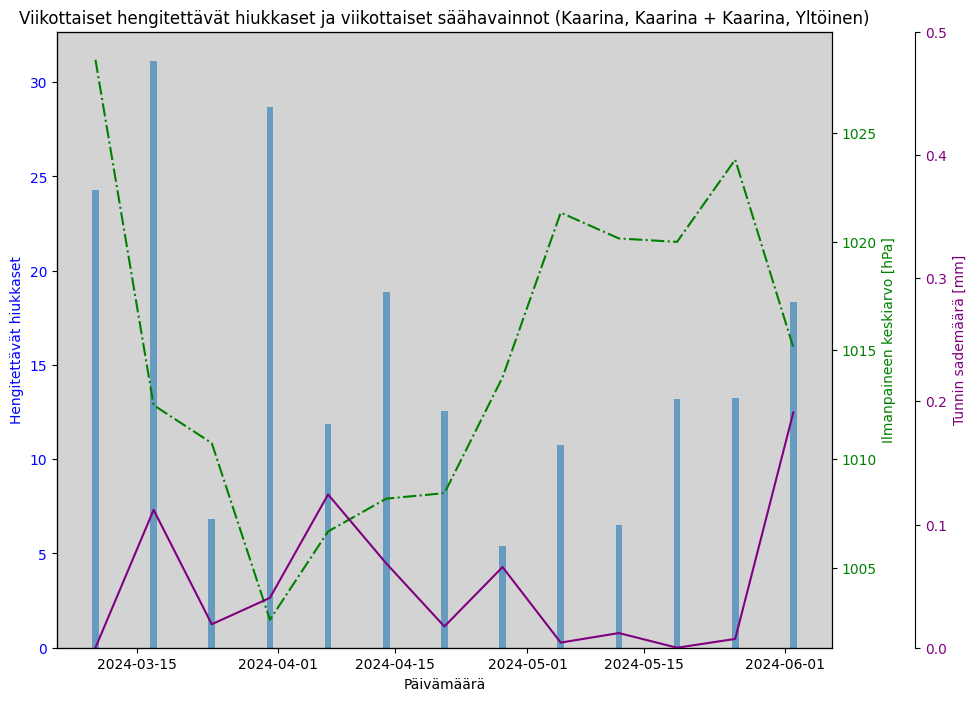

In [33]:
weekly_averages = daily_averages.resample('W', on='Date').mean().reset_index()
fig, ax1 = plt.subplots(figsize=(10,8))


ax1.bar(weekly_averages["Date"], weekly_averages["Hengitettävät hiukkaset <10 µm [µg/m3]"], alpha=0.6)
ax1.set_xlabel('Päivämäärä')
ax1.set_ylabel('Hengitettävät hiukkaset', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(weekly_averages["Date"], weekly_averages[weather_columns[0]], color="g", linestyle="dashdot")
ax2.set_ylabel(weather_columns[0], color='g')
ax2.tick_params(axis='y', labelcolor='g')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60)) 
ax3.plot(weekly_averages["Date"], weekly_averages[weather_columns[1]], color="purple")
ax3.set_ylabel(weather_columns[1], color='purple')
ax3.tick_params(axis='y', labelcolor='purple')
ax3.set_ylim(0,0.5)

# ax4 = ax1.twinx()
# ax4.spines['right'].set_position(('outward', 120)) 
# ax4.plot(weekly_averages["Date"], weekly_averages[weather_columns[5]], color="red", linestyle="dashdot")
# ax4.set_ylabel(weather_columns[5], color='red')
# ax4.tick_params(axis='y', labelcolor='red')


# ax5 = ax1.twinx()
# ax5.spines['right'].set_position(('outward', 180)) 
# ax5.plot(daily_averages["Date"], daily_averages[weather_columns[6]], color="yellow")
# ax5.set_ylabel(weather_columns[6], color='yellow')
# ax5.tick_params(axis='y', labelcolor='yellow')


ax1.set_facecolor('lightgray')
plt.title('Viikottaiset hengitettävät hiukkaset ja viikottaiset säähavainnot (Kaarina, Kaarina + Kaarina, Yltöinen)')
plt.show()

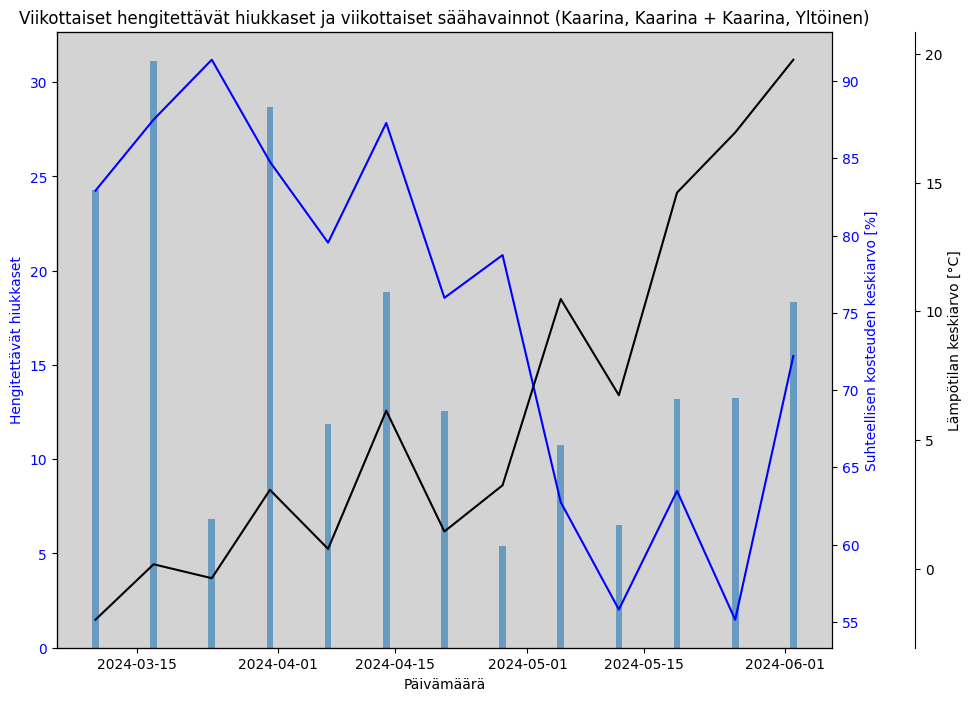

In [34]:
fig, ax1 = plt.subplots(figsize=(10,8))

fig
ax1.bar(weekly_averages["Date"], weekly_averages["Hengitettävät hiukkaset <10 µm [µg/m3]"], alpha=0.6)
ax1.set_xlabel('Päivämäärä')
ax1.set_ylabel('Hengitettävät hiukkaset', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(weekly_averages["Date"], weekly_averages[weather_columns[6]], color="blue")
ax2.set_ylabel(weather_columns[6], color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60)) 
ax3.plot(weekly_averages["Date"], weekly_averages[weather_columns[9]], color="black")
ax3.set_ylabel(weather_columns[9], color='black')
ax3.tick_params(axis='y', labelcolor='black')

# ax4 = ax1.twinx()
# ax4.spines['right'].set_position(('outward', 120)) 
# ax4.plot(daily_averages["Date"], daily_averages[weather_columns[5]], color="red")
# ax4.set_ylabel(weather_columns[5], color='red')
# ax4.tick_params(axis='y', labelcolor='red')


# ax5 = ax1.twinx()
# ax5.spines['right'].set_position(('outward', 180)) 
# ax5.plot(daily_averages["Date"], daily_averages[weather_columns[6]], color="yellow")
# ax5.set_ylabel(weather_columns[6], color='yellow')
# ax5.tick_params(axis='y', labelcolor='yellow')


ax1.set_facecolor('lightgray')
plt.title('Viikottaiset hengitettävät hiukkaset ja viikottaiset säähavainnot (Kaarina, Kaarina + Kaarina, Yltöinen)')
plt.show()

In [35]:
correlation_hourly = {}
correlation_daily = {}
correlation_weekly = {}


for column in weather_columns:
    correlation_hourly[column] = merged_df["Hengitettävät hiukkaset <10 µm [µg/m3]"].corr(merged_df[column])



for column in weather_columns:
    correlation_daily[column] = daily_averages["Hengitettävät hiukkaset <10 µm [µg/m3]"].corr(daily_averages[column])



for column in weather_columns:
    correlation_weekly[column] = weekly_averages["Hengitettävät hiukkaset <10 µm [µg/m3]"].corr(weekly_averages[column])


df_hourly = pd.DataFrame(correlation_hourly, index=["hourly"]).transpose().reset_index()
df_daily = pd.DataFrame(correlation_daily, index=["daily"]).transpose().reset_index()
df_weekly = pd.DataFrame(correlation_weekly, index=["weekly"]).transpose().reset_index()


df = pd.concat([df_hourly, df_daily, df_weekly], ignore_index=True)
correlation_df = df.pivot_table(index='index', values=['hourly', 'daily', 'weekly'], aggfunc='first').reset_index()

columns = list(correlation_df.columns)
columns[1], columns[2] = columns[2], columns[1]
correlation_df = correlation_df[columns]


correlation_df = correlation_df.sort_values(by=["weekly"], ascending=False)

print(correlation_df)


                                  index    hourly     daily    weekly
3  Suhteellisen kosteuden keskiarvo [%]  0.081307  0.119935  0.431890
4                 Tunnin sademäärä [mm]  0.019892 -0.047026  0.266462
1          Ilmanpaineen keskiarvo [hPa]  0.025016  0.049731 -0.155550
5                   Ylin lämpötila [°C] -0.066287 -0.113139 -0.164730
0                   Alin lämpötila [°C] -0.072410 -0.124462 -0.165156
2             Lämpötilan keskiarvo [°C] -0.069829 -0.119346 -0.165189


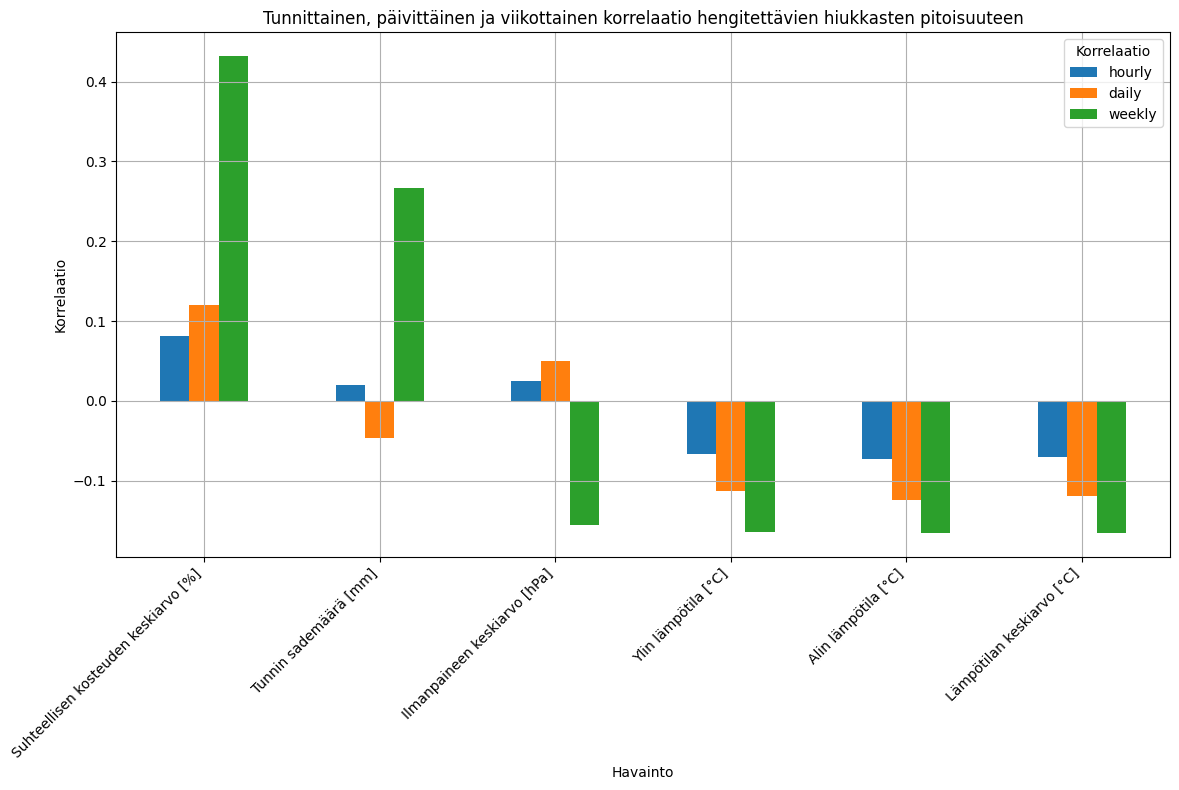

In [36]:
bar_df = correlation_df
bar_df = bar_df.set_index('index')

# Plotting the bar chart
ax = bar_df.plot(kind='bar', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Havainto')
plt.ylabel('Korrelaatio')
plt.title('Tunnittainen, päivittäinen ja viikottainen korrelaatio hengitettävien hiukkasten pitoisuuteen')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Korrelaatio')
plt.grid(True)
# Display the plot
plt.tight_layout()
plt.show()

In [37]:
#Sadepäivien tarkastelu. Keskiarvojen tarkastelu ei sovellu hyvin 0 arvoja sisältävälle suureelle. 

rain = pd.read_csv("Kaarina Yltöinen 5.3.2024 - 2.6.2024_e873e083-4b1e-467b-9860-3ee11ebad8ed.csv")

rain["Date"] = rain["Vuosi"].astype(str) + "-" + rain["Kuukausi"].astype(str) + "-" +  rain["Päivä"].astype(str) + " " + rain["Aika [UTC]"]
rain["Date"] = pd.to_datetime(rain["Date"])


aq = daily_averages[["Date", "Hengitettävät hiukkaset <10 µm [µg/m3]"]]
rain = rain[["Date", "Sademäärä [mm]"]]
rain['Sademäärä [mm]'] = rain['Sademäärä [mm]'].replace(-1, 0)
rain_df = pd.merge(rain, aq, on="Date")

In [38]:
no_rain = rain_df[rain_df["Sademäärä [mm]"] == 0]
print(f"Sateettomien päivien keskimääräinen hiukkaspitoisuus: {no_rain['Hengitettävät hiukkaset <10 µm [µg/m3]'].mean()}")
yes_rain = rain_df[rain_df["Sademäärä [mm]"] > 0]
print(f"Sadepäivien keskimääräinen hiukkaspitoisuus: {yes_rain['Hengitettävät hiukkaset <10 µm [µg/m3]'].mean()}")

Sateettomien päivien keskimääräinen hiukkaspitoisuus: 15.090327380952381
Sadepäivien keskimääräinen hiukkaspitoisuus: 16.071805555555557


In [39]:
df = rain_df

df['Previous Rain'] = df["Sademäärä [mm]"].shift(1)

# Filter DataFrame for days with rain and days without rain on the previous day
rainy_previous_day = df[df['Previous Rain'] > 0]
non_rainy_previous_day = df[df['Previous Rain'] == 0]

# Calculate mean air quality for each group
mean_air_quality_rainy = rainy_previous_day['Hengitettävät hiukkaset <10 µm [µg/m3]'].mean()
mean_air_quality_non_rainy = non_rainy_previous_day['Hengitettävät hiukkaset <10 µm [µg/m3]'].mean()


print("Ei sadetta edellisenä päivänä:", mean_air_quality_non_rainy)
print("Sadetta edellisenä päivänä:", mean_air_quality_rainy)

Ei sadetta edellisenä päivänä: 17.708869047619046
Sadetta edellisenä päivänä: 10.784913793103447


In [40]:
# TODO: Edellisen x päivän kumulatiivinen sademäärä ja ilmanlaadun korrelaatio 

cumulative_df = rain_df

cumulative_df.set_index('Date', inplace=True)


cumulative_df['Sademäärä [mm] 2-day'] = cumulative_df['Sademäärä [mm]'].rolling(window=2).sum()
cumulative_df['Sademäärä [mm] 3-day'] = cumulative_df['Sademäärä [mm]'].rolling(window=3).sum()
cumulative_df['Sademäärä [mm] 4-day'] = cumulative_df['Sademäärä [mm]'].rolling(window=4).sum()
cumulative_df['Sademäärä [mm] 5-day'] = cumulative_df['Sademäärä [mm]'].rolling(window=5).sum()
cumulative_df['Sademäärä [mm] 6-day'] = cumulative_df['Sademäärä [mm]'].rolling(window=6).sum()
cumulative_df['Sademäärä [mm] 7-day'] = cumulative_df['Sademäärä [mm]'].rolling(window=7).sum()

 
cumulative_df.reset_index(inplace=True)

In [41]:
#Pudotetaan ensimmäiset 7 päivää
filter_cumulative = cumulative_df.drop(index=cumulative_df.index[:6])

#Spearman 
print(f"Sademäärän korrelaatio: {filter_cumulative['Sademäärä [mm]'].corr(filter_cumulative['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"2 päivän kumulatiivisen sademäärän korrelaatio: {filter_cumulative['Sademäärä [mm] 2-day'].corr(filter_cumulative['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"3 päivän kumulatiivisen sademäärän korrelaatio: {filter_cumulative['Sademäärä [mm] 3-day'].corr(filter_cumulative['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"4 päivän kumulatiivisen sademäärän korrelaatio: {filter_cumulative['Sademäärä [mm] 4-day'].corr(filter_cumulative['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"5 päivän kumulatiivisen sademäärän korrelaatio: {filter_cumulative['Sademäärä [mm] 5-day'].corr(filter_cumulative['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"6 päivän kumulatiivisen sademäärän korrelaatio: {filter_cumulative['Sademäärä [mm] 6-day'].corr(filter_cumulative['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"7 päivän kumulatiivisen sademäärän korrelaatio: {filter_cumulative['Sademäärä [mm] 7-day'].corr(filter_cumulative['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")


Sademäärän korrelaatio: 0.2101253648638789
2 päivän kumulatiivisen sademäärän korrelaatio: -0.02234957208626718
3 päivän kumulatiivisen sademäärän korrelaatio: -0.09151646383600026
4 päivän kumulatiivisen sademäärän korrelaatio: -0.11004180233104516
5 päivän kumulatiivisen sademäärän korrelaatio: -0.1546718812610668
6 päivän kumulatiivisen sademäärän korrelaatio: -0.18250997577538722
7 päivän kumulatiivisen sademäärän korrelaatio: -0.25283146260978323


In [42]:
non_zero = filter_cumulative[filter_cumulative["Sademäärä [mm]"] > 0]
print(f"Sademäärän korrelaatio: {non_zero['Sademäärä [mm]'].corr(non_zero['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"2 päivän kumulatiivisen sademäärän korrelaatio: {non_zero['Sademäärä [mm] 2-day'].corr(non_zero['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"3 päivän kumulatiivisen sademäärän korrelaatio: {non_zero['Sademäärä [mm] 3-day'].corr(non_zero['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"4 päivän kumulatiivisen sademäärän korrelaatio: {non_zero['Sademäärä [mm] 4-day'].corr(non_zero['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"5 päivän kumulatiivisen sademäärän korrelaatio: {non_zero['Sademäärä [mm] 5-day'].corr(non_zero['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"6 päivän kumulatiivisen sademäärän korrelaatio: {non_zero['Sademäärä [mm] 6-day'].corr(non_zero['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"7 päivän kumulatiivisen sademäärän korrelaatio: {non_zero['Sademäärä [mm] 7-day'].corr(non_zero['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")

Sademäärän korrelaatio: 0.15985755716257374
2 päivän kumulatiivisen sademäärän korrelaatio: -0.16866934106943915
3 päivän kumulatiivisen sademäärän korrelaatio: -0.10191366518443686
4 päivän kumulatiivisen sademäärän korrelaatio: -0.13664182356957186
5 päivän kumulatiivisen sademäärän korrelaatio: -0.25876070913262733
6 päivän kumulatiivisen sademäärän korrelaatio: -0.2654060066740823
7 päivän kumulatiivisen sademäärän korrelaatio: -0.38940810932918013


#### Kumulatiivinen sarake totuusarvoina

In [43]:
boolean_df = filter_cumulative
def transform_value(x):
    return 1 if x != 0 else 0

columns_to_transform = [
    'Sademäärä [mm] 2-day',
    'Sademäärä [mm] 3-day',
    'Sademäärä [mm] 4-day',
    'Sademäärä [mm] 5-day',
    'Sademäärä [mm] 6-day',
    'Sademäärä [mm] 7-day'
]

boolean_df[columns_to_transform] = boolean_df[columns_to_transform].map(transform_value)

In [44]:
print("Sademäärien totuusarvo (1/0) korrelaatiot")
print(f"Sademäärän korrelaatio totuusarvoina: {boolean_df['Sademäärä [mm]'].corr(boolean_df['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"2 päivän kumulatiivisen sademäärän korrelaatio totuusarvoina: {boolean_df['Sademäärä [mm] 2-day'].corr(boolean_df['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"3 päivän kumulatiivisen sademäärän korrelaatio totuusarvoina: {boolean_df['Sademäärä [mm] 3-day'].corr(boolean_df['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"4 päivän kumulatiivisen sademäärän korrelaatio totuusarvoina: {boolean_df['Sademäärä [mm] 4-day'].corr(boolean_df['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"5 päivän kumulatiivisen sademäärän korrelaatio totuusarvoina: {boolean_df['Sademäärä [mm] 5-day'].corr(boolean_df['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"6 päivän kumulatiivisen sademäärän korrelaatio totuusarvoina: {boolean_df['Sademäärä [mm] 6-day'].corr(boolean_df['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"7 päivän kumulatiivisen sademäärän korrelaatio totuusarvoina: {boolean_df['Sademäärä [mm] 7-day'].corr(boolean_df['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")

Sademäärien totuusarvo (1/0) korrelaatiot
Sademäärän korrelaatio totuusarvoina: 0.2101253648638789
2 päivän kumulatiivisen sademäärän korrelaatio totuusarvoina: 0.0014767161045125107
3 päivän kumulatiivisen sademäärän korrelaatio totuusarvoina: -0.03046393392827167
4 päivän kumulatiivisen sademäärän korrelaatio totuusarvoina: 0.006055892628533459
5 päivän kumulatiivisen sademäärän korrelaatio totuusarvoina: -0.008801812181816393
6 päivän kumulatiivisen sademäärän korrelaatio totuusarvoina: -0.04501242031882372
7 päivän kumulatiivisen sademäärän korrelaatio totuusarvoina: -0.11461739330983542


In [45]:
hourly_rain_df = merged_df[["Date", "Hengitettävät hiukkaset <10 µm [µg/m3]", "Tunnin sademäärä [mm]"]]

In [46]:
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
cumulative_hour_df = hourly_rain_df

cumulative_hour_df.set_index('Date', inplace=True)


cumulative_hour_df['Sademäärä [mm] 2-hour'] = cumulative_hour_df["Tunnin sademäärä [mm]"].rolling(window=2).sum()
cumulative_hour_df['Sademäärä [mm] 5-hour'] = cumulative_hour_df["Tunnin sademäärä [mm]"].rolling(window=5).sum()
cumulative_hour_df['Sademäärä [mm] 10-hour'] = cumulative_hour_df["Tunnin sademäärä [mm]"].rolling(window=10).sum()
cumulative_hour_df['Sademäärä [mm] 15-hour'] = cumulative_hour_df["Tunnin sademäärä [mm]"].rolling(window=15).sum()
cumulative_hour_df['Sademäärä [mm] 20-hour'] = cumulative_hour_df["Tunnin sademäärä [mm]"].rolling(window=20).sum()
cumulative_hour_df['Sademäärä [mm] 24-hour'] = cumulative_hour_df["Tunnin sademäärä [mm]"].rolling(window=24).sum()

 
cumulative_hour_df.reset_index(inplace=True)

In [47]:
filter_hourly = cumulative_hour_df.drop(index=cumulative_hour_df.index[:23])

In [48]:


print(f"Sademäärän korrelaatio: {filter_hourly['Tunnin sademäärä [mm]'].corr(filter_hourly['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"2 tunnin kumulatiivisen sademäärän korrelaatio: {filter_hourly['Sademäärä [mm] 2-hour'].corr(filter_hourly['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"5 tunnin kumulatiivisen sademäärän korrelaatio: {filter_hourly['Sademäärä [mm] 5-hour'].corr(filter_hourly['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"10 tunnin kumulatiivisen sademäärän korrelaatio: {filter_hourly['Sademäärä [mm] 10-hour'].corr(filter_hourly['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"15 tunnin kumulatiivisen sademäärän korrelaatio: {filter_hourly['Sademäärä [mm] 15-hour'].corr(filter_hourly['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"20 tunnin kumulatiivisen sademäärän korrelaatio: {filter_hourly['Sademäärä [mm] 20-hour'].corr(filter_hourly['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")
print(f"24 tunnin kumulatiivisen sademäärän korrelaatio: {filter_hourly['Sademäärä [mm] 24-hour'].corr(filter_hourly['Hengitettävät hiukkaset <10 µm [µg/m3]'], method='spearman')}")

Sademäärän korrelaatio: 0.026439804220866055
2 tunnin kumulatiivisen sademäärän korrelaatio: 0.035645804907833215
5 tunnin kumulatiivisen sademäärän korrelaatio: 0.026286416866494047
10 tunnin kumulatiivisen sademäärän korrelaatio: -0.028721034375668118
15 tunnin kumulatiivisen sademäärän korrelaatio: -0.10856093352991555
20 tunnin kumulatiivisen sademäärän korrelaatio: -0.1630055367415136
24 tunnin kumulatiivisen sademäärän korrelaatio: -0.19309140183116735
